# Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from __future__ import division
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import pandas as pd
from sklearn.model_selection import train_test_split
import theano
import cv2
from sklearn import preprocessing
%pylab inline

Using Theano backend.
WARNING (theano.configdefaults): Only clang++ is supported. With g++, we end up with strange g++/OSX bugs.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


Populating the interactive namespace from numpy and matplotlib


## Perform hierarchical clustering on observations (columns)

In [98]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, set_link_color_palette
import scipy.spatial.distance as ssd
from faker import Factory

fake = Factory.create()
colorList = []

for i in range(5000):
    colorList.append(fake.hex_color())

set_link_color_palette(colorList)

df = pd.read_csv('2016-17_advanced.csv')
df = df.groupby('Player').min()
df.reset_index(inplace=True)
df = df[df['MP'] >= 500]
df = df[df['Yr'] >= 2011]
df = df[df['Yr'] <= 2016]
# df = df[df['Player_ID'].isin(df2['Player_ID'].unique())]
# df3 = df[df['Player_ID'].duplicated()]
# df = df[df['Player_ID'].isin(df3['Player_ID'].unique())]
df.reset_index(inplace=True, drop=True)
df2 = pd.read_csv('2016-17_advanced.csv')
grab1 = np.array(df['Player_ID'].values)
grab2 = np.array(df['Yr'].values)

cats = []

for i in range(len(grab1)):
    df_cat = df2[df2['Player_ID'] == grab1[i]]
    cats.extend(df_cat[df_cat['Yr'] == grab2[i] + 3].index.values)

df2 = df2.iloc[cats]
df2.reset_index(inplace=True, drop=True)
df = df[df['Player_ID'].isin(df2['Player_ID'].values)]
df.reset_index(inplace=True, drop=True)
df['Player_ID'] = df['Player_ID'].astype(int)
y = np.array(df2['OBPM'].values)
pid = np.array(df['Player_ID'].values)
yr = np.array(df['Yr'].values)
images = []
for i in range(len(pid)):
    images.append(cv2.imread('thumbnails/thumbnail_{0}_{1}-{2}.png'.format(str(pid[i]), str(yr[i]-1), str(yr[i])[-2:]), 0))
X = np.array(images)
flat_exes = []
for i in range(len(X)):
    flat_exes.append(X[i].flatten())
X = np.array(flat_exes)

/Users/Peter/python-fundamentals/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


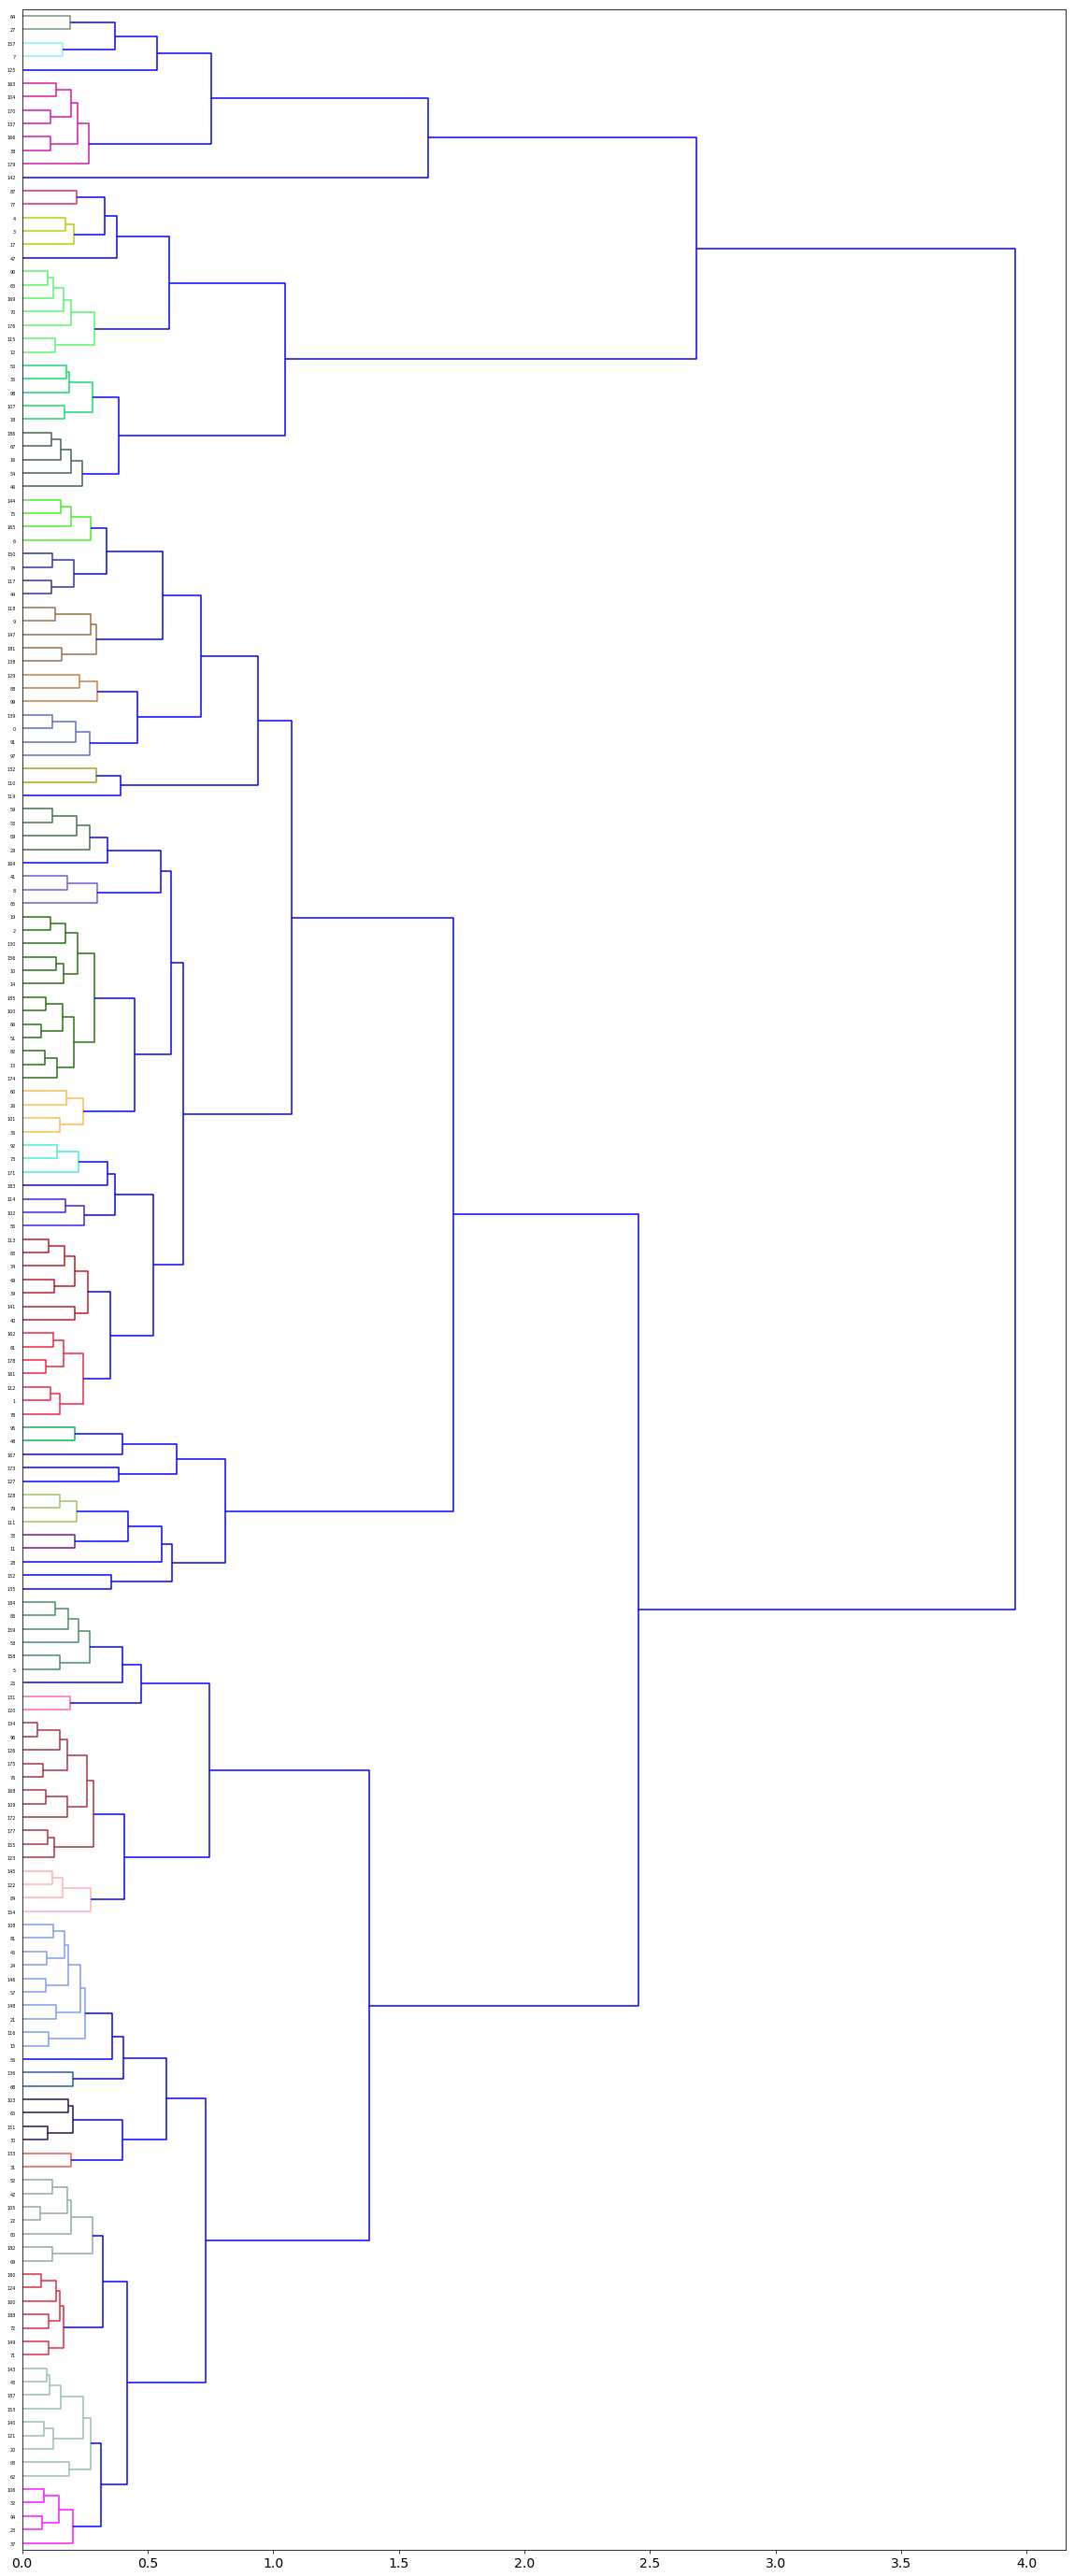

In [104]:
# Create distance matrix on columns using cosine distance
# convert the redundant n*n square matrix form into a condensed nC2 array
dist = ssd.squareform(pdist(X, 'cosine'))
clust = linkage(dist, method='complete')

fig, ax = plt.subplots(figsize=(20,50))
_ = dendrogram(clust, color_threshold=.3, orientation='right', ax=ax)
_ = plt.xticks(fontsize=14)

In [105]:
R = dendrogram(clust,
                color_threshold=.3, no_plot=True)

In [106]:
from collections import defaultdict
from matplotlib.colors import rgb2hex, colorConverter

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'

        html += '</table>'

        return html

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l

    return cluster_classes

lineups = get_cluster_classes(R)

In [107]:
lineups

#fe13fe,"['23', '94', '32', '106', '37']"
#99beae,"['62', '93', '121', '140', '20', '43', '143', '187', '153']"
#da2a3d,"['71', '149', '72', '188', '124', '180', '160']"
#8bac9f,"['69', '182', '22', '105', '42', '52', '80']"
#e35c51,"['31', '133']"
#270e55,"['30', '151', '65', '103']"
#2c56a3,"['68', '136']"
#7d9bf0,"['15', '116', '21', '148', '57', '146', '24', '45', '81', '108', '24']"
b,"['56', '30', '25', '135', '152', '28', '127', '173', '167', '183', '164', '119', '47', '125', '142']"
#fdb3b8,"['122', '145', '84', '154']"
#a53140,"['155', '177', '123', '109', '168', '172', '76', '175', '96', '134', '126']"


In [110]:
for ok in range(len(list(lineups.values()))):
    comps = list(lineups.values())[ok]

    thing = []

    for i in comps:
        thing.append([df['Player'][int(i)], df['Yr'][int(i)], df['Age'][int(i)], df2['AST%'][int(i)]])

    loadout = pd.DataFrame(thing)
    loadout.rename(columns={0:'Player', 1: 'Year', 2: 'Age', 3: 'OBPM in 2 Years'},inplace=True)
    loadout = loadout.sort_values('OBPM in 2 Years', ascending=False)
    loadout = loadout.sort_values('Age', ascending=True)
    loadout.reset_index(inplace=True, drop=True)
    print(loadout)
    print('------------')

                     Player  Year  Age  OBPM in 2 Years
0              Devin Booker  2016   19             34.1
1  Kentavious Caldwell-Pope  2014   20             11.2
2           Josh Richardson  2016   22             17.9
3               CJ McCollum  2015   23             15.8
4               Danny Green  2012   24             10.3
------------
             Player  Year  Age  OBPM in 2 Years
0      Xavier Henry  2011   19              8.8
1    Gordon Hayward  2011   20             24.1
2       Ricky Rubio  2012   21             43.5
3   Otto Porter Jr.  2015   21             10.1
4    Draymond Green  2013   22             29.0
5   Jordan Crawford  2011   22             25.1
6     Norman Powell  2016   22             11.6
7     Marcus Morris  2013   23             11.0
8  Bojan Bogdanovic  2015   25              7.1
------------
            Player  Year  Age  OBPM in 2 Years
0      Zach LaVine  2015   19             18.6
1      Paul George  2011   20             17.9
2    Iman Shumper

In [131]:
df[df['Player'] == 'Jamal Murray']

,Player,Player_ID,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Yr
68,Jamal Murray,1627750,SG,19,DEN,82,1764,11.9,0.518,0.471,...,21.6,0.6,0.7,1.4,0.037,-0.5,-2.1,-2.6,-0.3,2017


In [78]:
df = pd.read_csv('2016-17_advanced.csv')
df = pd.read_csv('2016-17_advanced.csv')
df = df[df['MP'] >= 500]
df = df[df['Yr'] >= 2011]
df2 = df[df['Age'] <= 23]
df = df[df['Player_ID'].isin(df2['Player_ID'].unique())]
df3 = df[df['Player_ID'].duplicated()]
df = df[df['Player_ID'].isin(df3['Player_ID'].unique())]
df_init = df.groupby('Player').min()
df.reset_index(inplace=True, drop=True)
df['Player_ID'] = df['Player_ID'].astype(int)
y = np.array(df['OBPM'].values)
pid = np.array(df['Player_ID'].values)
yr = np.array(df['Yr'].values)
images = []
for i in range(len(pid)):
    images.append(cv2.imread('thumbnails/thumbnail_{0}_{1}-{2}.png'.format(str(pid[i]), str(yr[i]-1), str(yr[i])[-2:]), 0))
X = np.array(images)
flat_exes = []
for i in range(len(X)):
    flat_exes.append(X[i].flatten())
X = np.array(flat_exes)

In [62]:
df = pd.read_csv('2016-17_advanced.csv')
df = df[df['MP'] >= 500]
df = df[df['Yr'] >= 2011]
df2 = df[df['Age'] <= 23]
df = df[df['Player_ID'].isin(df2['Player_ID'].unique())]
df3 = df[df['Player_ID'].duplicated()]
df = df[df['Player_ID'].isin(df3['Player_ID'].unique())]
df_init = df.groupby('Player').min()
df.reset_index(inplace=True, drop=True)